# Лабораторная 1. Очистка набора данных

Отбор признаков - важная задача перед обучением модели машинного обучения. Признаки отбираются чаще всего вручную на основании описательной статистики, тепловой карты, показывающей линейную корреляцию и важности признаков. Никогда не смотрят только на что-то одно, всегда признаки рассматривают с разных сторон.

# Подключение модулей

Для определения важности признаков можно использовать вектор feature_importance, которые строится с помощью Random Forest. При этом для задач регрессии необходимо подключать именно RandomForestRegressor, для задач классификации - RandomForestClassifier

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Загрузка данных (регрессия)

В данной задаче у нас 28 признаков и 2 целевые переменные (G_total и КГФ). И это вносит дополнительную сложность, так как первая целевая переменная с большим количество пропусков.

In [3]:
df = pd.read_excel('1. Data.xlsx', sheet_name='VU')

In [4]:
df

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,...,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
0,3576.3,7.94,249.600000,370.1,101.800000,249.0,359.6,101.800,53.0,31.7,...,45.25,56.5,NaN,93.6,0.806017,801.0,1000.0,0.669449,2.782623,311.9094
1,3576.3,9.53,233.500000,364.6,101.300000,249.0,338.1,102.400,58.8,37.6,...,45.25,56.5,NaN,92.9,0.806017,801.0,1000.0,0.669449,3.697781,288.6003
2,3576.3,11.11,213.400000,357.1,101.600000,211.0,314.8,100.600,63.6,42.8,...,45.25,56.5,NaN,91.4,0.806017,801.0,1000.0,0.669449,4.515073,248.7906
3,3576.3,12.70,191.600000,347.4,98.400000,187.0,291.5,99.000,64.7,46.2,...,45.25,56.5,NaN,89.2,0.806017,801.0,1000.0,0.669449,5.217673,223.5591
4,3576.3,14.29,171.900000,337.7,99.200000,169.0,270.3,99.500,64.0,49.4,...,45.25,56.5,NaN,89.7,0.806017,801.0,1000.0,0.669449,5.765092,215.1486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,3284.0,12.70,215.000000,307.8,98.600000,215.0,308.1,97.200,65.0,45.8,...,35.28,40.5,41.6,94.4,NaN,782.0,NaN,0.660000,NaN,153.0000
89,3284.0,14.29,198.000000,293.6,98.500000,197.0,293.9,98.400,66.9,49.8,...,35.28,40.5,41.6,94.0,NaN,782.0,NaN,0.660000,NaN,147.0000
90,3288.6,7.94,231.229167,309.1,92.600000,230.0,307.1,92.700,51.0,NaN,...,33.21,NaN,NaN,89.9,NaN,779.6,NaN,0.668000,NaN,182.0000
91,3288.6,11.11,217.201681,293.9,93.100000,215.0,293.9,93.300,60.0,NaN,...,33.21,NaN,NaN,90.8,NaN,779.6,NaN,0.668000,NaN,145.0000


# Описательная статистика

Описательная статистика для непрерывных и категориальных признаках отличается.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               90 non-null     float64
 1   Dшт                             93 non-null     float64
 2   Руст(ср)                        93 non-null     float64
 3   Рзаб(ср)                        90 non-null     float64
 4   Pлин(ср)                        93 non-null     float64
 5   Руст(кон)                       93 non-null     float64
 6   Рзаб(кон)                       90 non-null     float64
 7   Рлин(кон)                       93 non-null     float64
 8   Туст                            93 non-null     float64
 9   Тна шлейфе                      60 non-null     float64
 10  Тзаб                            90 non-null     float64
 11  Tлин                            93 non-null     float64
 12  Дебит газа(ст)                  93 non

In [6]:
df.describe()

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,...,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
count,90.000000,93.000000,93.000000,90.000000,93.000000,93.000000,90.000000,93.000000,93.000000,60.000000,...,88.000000,81.000000,64.000000,93.000000,23.000000,93.000000,23.0,93.000000,23.000000,93.000000
mean,3524.086667,10.951183,228.293412,331.762255,99.860962,227.837817,330.334444,98.005453,56.172043,43.091667,...,40.682881,50.943684,50.773438,95.162366,0.807631,780.847527,1000.0,0.665260,5.742359,201.705968
std,144.474862,2.423172,41.897238,56.481235,7.300663,41.814527,56.357493,12.425851,11.250781,19.602337,...,5.374353,4.378416,4.006591,5.136060,0.015076,62.795111,0.0,0.020485,2.112717,49.253925
min,3276.000000,6.350000,138.157895,174.000000,73.306638,136.000000,174.000000,40.739839,24.200000,14.000000,...,29.170000,39.900000,41.600000,85.500000,0.787416,186.000000,1000.0,0.570000,2.782623,131.000000
25%,3427.625000,9.530000,201.636750,297.797500,95.945951,200.000000,294.625000,95.335032,50.300000,33.300000,...,37.210000,48.300000,49.425000,90.700000,0.787416,782.000000,1000.0,0.660000,4.381813,164.000000
50%,3579.000000,11.110000,229.894737,337.789172,100.800000,228.000000,334.250000,100.260000,58.000000,38.700000,...,39.466050,50.800000,50.900000,94.200000,0.806017,787.000000,1000.0,0.667000,5.250915,192.000000
75%,3652.250000,12.700000,252.000000,364.150000,103.865199,252.000000,362.150000,104.000000,64.000000,46.375000,...,42.860000,55.400000,52.700000,99.800000,0.821344,793.700000,1000.0,0.679000,6.125723,224.000000
max,3670.000000,15.880000,337.108108,458.600000,121.682930,333.000000,458.500000,123.616800,75.000000,110.200000,...,53.270000,56.700000,56.800000,104.000000,0.824330,801.000000,1000.0,0.684660,10.931155,385.415949


Стандартные функции pandas не выводят всю необходимую описательную статистику, поэтому создадим свою таблицу с описательной статистикой. Для удобства закрасим признаки с единичной мощностью и большим количеством пропусков, чтобы потом их было легче удалить.

In [7]:
C=len(df.columns)
L=len(df.index)
CN=df.count() #количество
NP=((L-CN)/L)*100 #процент пропущенных значений
MN=df.min() #минимум
Q1=df.quantile(q=0.25) #первый квартиль
MA=df.mean() #среднее значение
ME=df.median() #медиана
Q3=df.quantile(q=0.75) #третий квартиль
MX=df.max() #максимум
ST=df.std() #стандартное отклонение
P=df.nunique() #мощность
IQ=Q3-Q1 #интерквартильный размах

In [8]:
frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame=frame.T
f=pd.DataFrame(frame)
f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1=f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
f1

,Глубина манометра,Dшт,Руст(ср),Рзаб(ср),Pлин(ср),Руст(кон),Рзаб(кон),Рлин(кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа(ст),Дебит ст. конд.(ст),Дебит воды(ст),Дебит смеси(ст),Дебит газа(лин),Дебит кон нестабильный(лин),Дебит воды(лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
Количество,90.000000,93.000000,93.000000,90.000000,93.000000,93.000000,90.000000,93.000000,93.000000,60.000000,90.000000,93.000000,93.000000,93.000000,93.000000,89.000000,93.000000,93.000000,93.000000,93.000000,88.000000,81.000000,64.000000,93.000000,23.000000,93.000000,23.000000,93.000000,23.000000,93.000000
Процент пропусков,3.225806,0.000000,0.000000,3.225806,0.000000,0.000000,3.225806,0.000000,0.000000,35.483871,3.225806,0.000000,0.000000,0.000000,0.000000,4.301075,0.000000,0.000000,0.000000,0.000000,5.376344,12.903226,31.182796,0.000000,75.268817,0.000000,75.268817,0.000000,75.268817,0.000000
Минимум,3276.000000,6.350000,138.157895,174.000000,73.306638,136.000000,174.000000,40.739839,24.200000,14.000000,100.210000,16.204686,128.365641,33.629767,0.000000,136.815245,884.000000,59.800000,0.000000,30.000000,29.170000,39.900000,41.600000,85.500000,0.787416,186.000000,1000.000000,0.570000,2.782623,131.000000
Первый квартиль,3427.625000,9.530000,201.636750,297.797500,95.945951,200.000000,294.625000,95.335032,50.300000,33.300000,104.525000,33.688653,287.950295,69.900000,0.700000,306.243434,2223.000000,116.800000,0.700000,44.200000,37.210000,48.300000,49.425000,90.700000,0.787416,782.000000,1000.000000,0.660000,4.381813,164.000000
Среднее,3524.086667,10.951183,228.293412,331.762255,99.860962,227.837817,330.334444,98.005453,56.172043,43.091667,104.961400,39.798184,394.402772,99.909533,2.132827,417.021121,3282.971050,164.151613,2.163441,52.703325,40.682881,50.943684,50.773438,95.162366,0.807631,780.847527,1000.000000,0.665260,5.742359,201.705968
Медиана,3579.000000,11.110000,229.894737,337.789172,100.800000,228.000000,334.250000,100.260000,58.000000,38.700000,105.110000,40.519491,383.719622,89.800000,1.400000,401.391397,3112.000000,143.500000,1.400000,56.800000,39.466050,50.800000,50.900000,94.200000,0.806017,787.000000,1000.000000,0.667000,5.250915,192.000000
Третий квартиль,3652.250000,12.700000,252.000000,364.150000,103.865199,252.000000,362.150000,104.000000,64.000000,46.375000,105.567500,47.800000,489.673000,117.600000,3.200000,509.046953,4165.000000,185.200000,3.300000,63.500000,42.860000,55.400000,52.700000,99.800000,0.821344,793.700000,1000.000000,0.679000,6.125723,224.000000
Максимум,3670.000000,15.880000,337.108108,458.600000,121.682930,333.000000,458.500000,123.616800,75.000000,110.200000,107.071000,55.513904,846.816143,302.621077,8.340288,896.908271,6943.100000,492.800000,8.100000,72.539800,53.270000,56.700000,56.800000,104.000000,0.824330,801.000000,1000.000000,0.684660,10.931155,385.415949
Стандартное отклонение,144.474862,2.423172,41.897238,56.481235,7.300663,41.814527,56.357493,12.425851,11.250781,19.602337,1.250941,8.937669,150.354801,49.140664,1.874972,157.746532,1353.043667,85.225100,1.903132,12.149424,5.374353,4.378416,4.006591,5.136060,0.015076,62.795111,0.000000,0.020485,2.112717,49.253925
Мощность,20.000000,10.000000,87.000000,88.000000,91.000000,72.000000,89.000000,88.000000,51.000000,57.000000,68.000000,89.000000,93.000000,92.000000,77.000000,89.000000,92.000000,90.000000,42.000000,14.000000,21.000000,18.000000,13.000000,70.000000,6.000000,25.000000,1.000000,21.000000,23.000000,72.000000


Удалим признаки, у которых мощность равна 1 и пропусков слишком много

In [9]:
df=df.drop(['Ro_g', 'Ro_w'], axis=1)

# Тепловая карта

<Axes: >

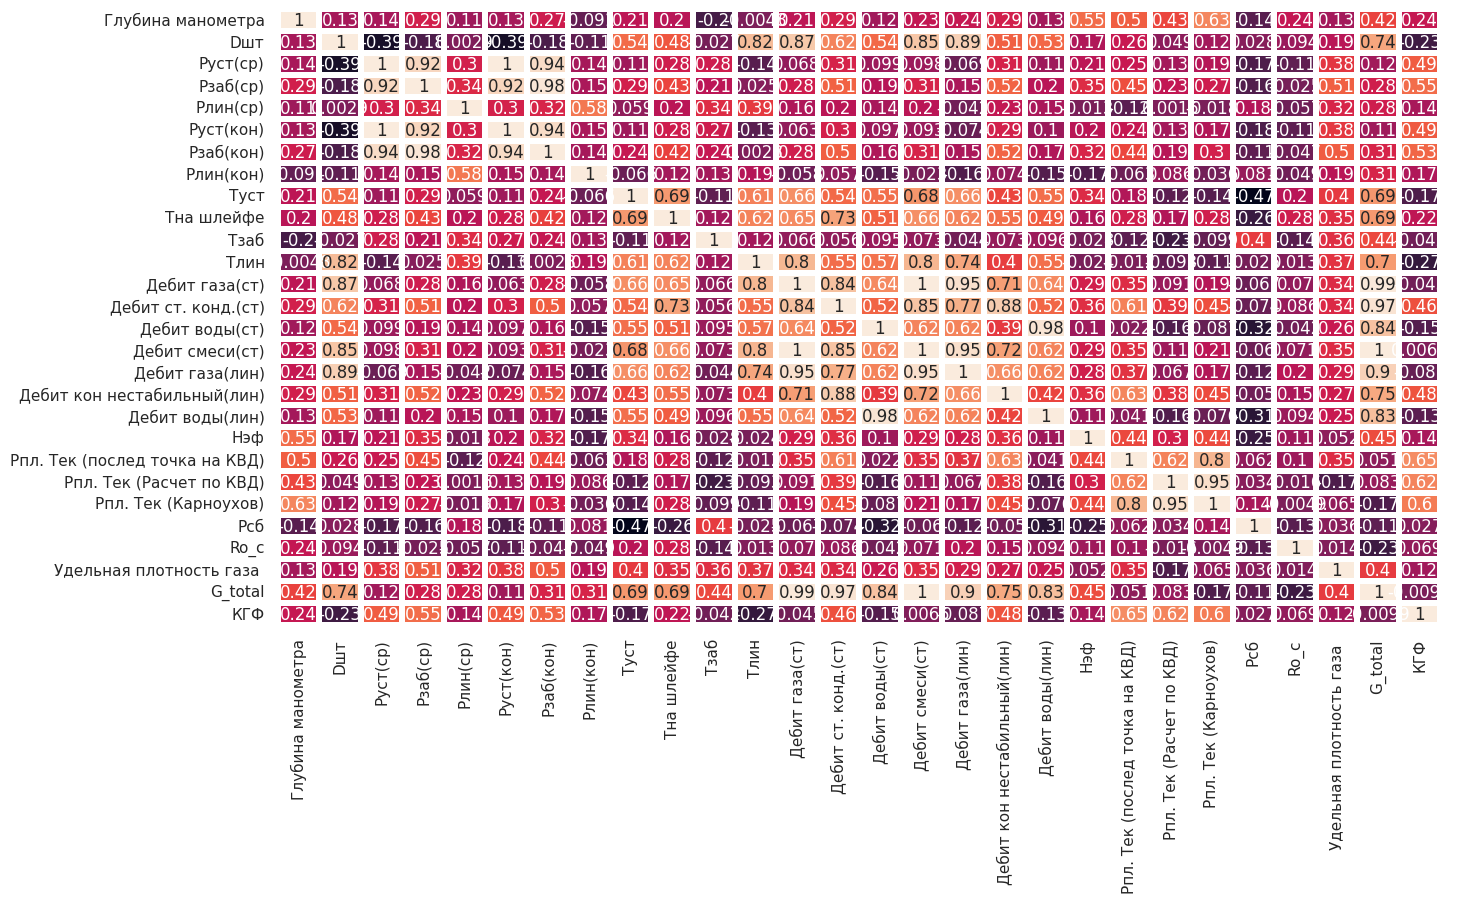

In [10]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot=True, linewidths=3, cbar=False)

# Распределения

Построим графики распределения значений признаков. Дополнительно покажем линиями первый и третий квартили, медиану и среднее. Также выведем пороги отсечения выбросов по интерквартильному размаху.
Единственный выброс, который здесь можно гарантированно увидеть, это слева у признака "Ro_c"

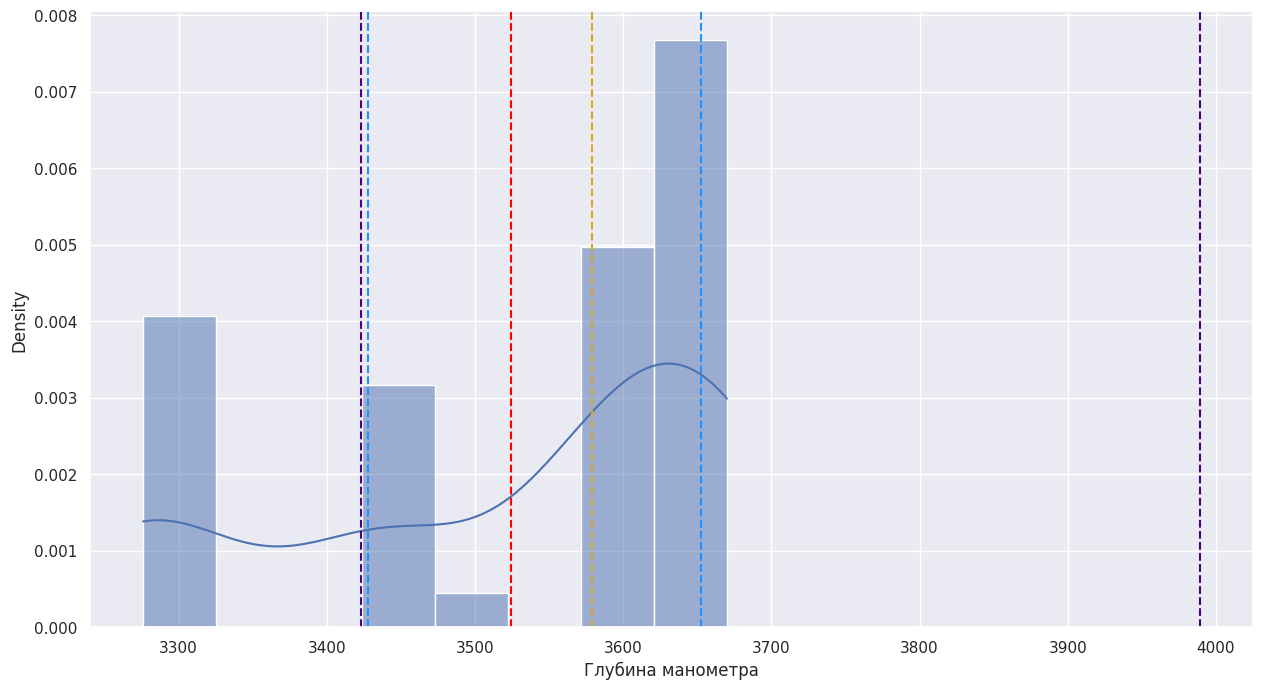

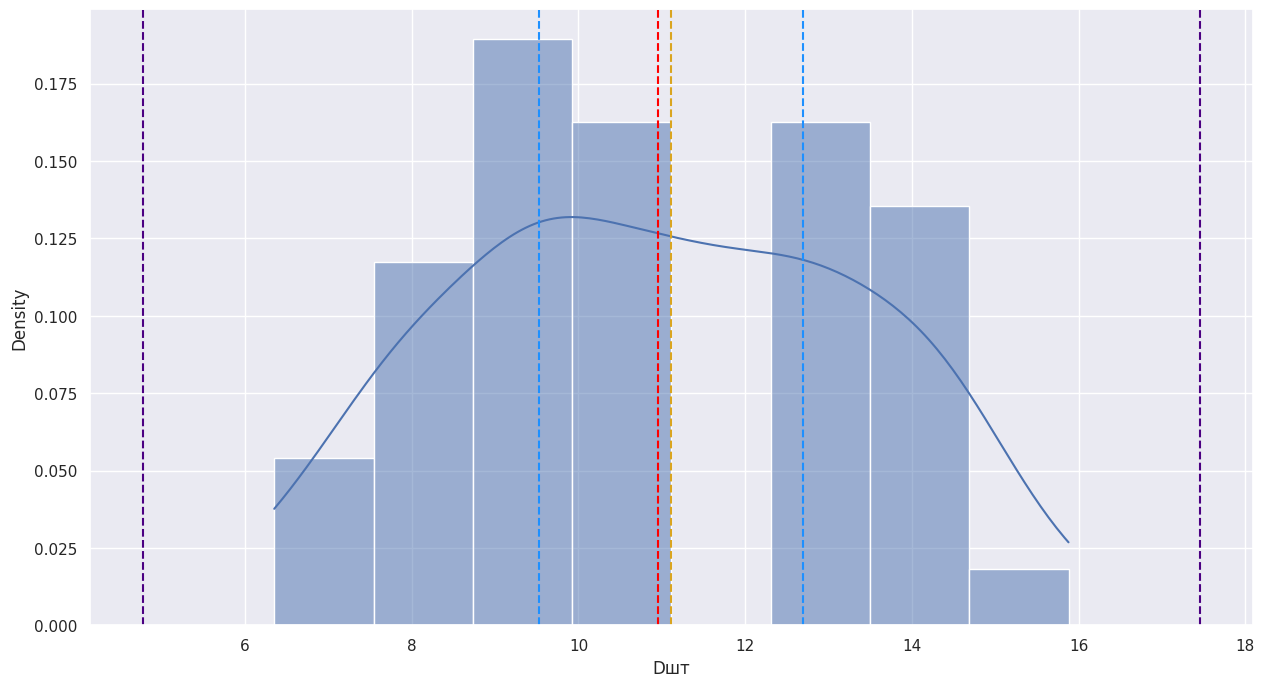

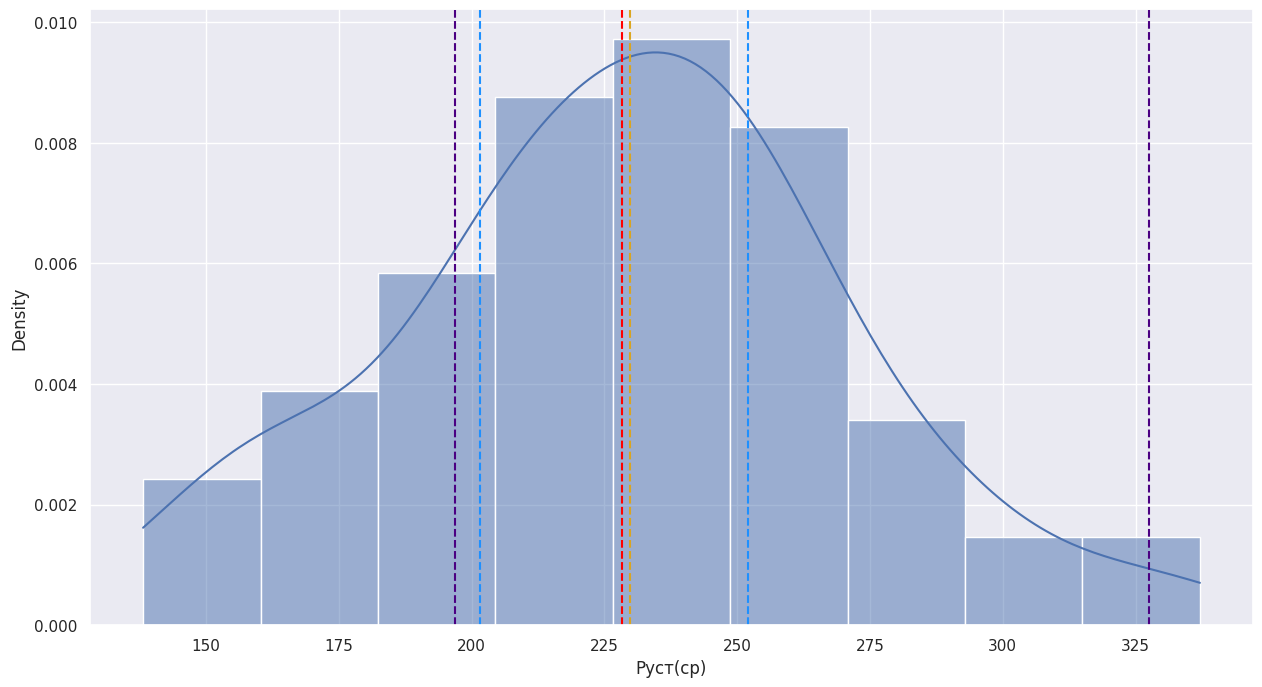

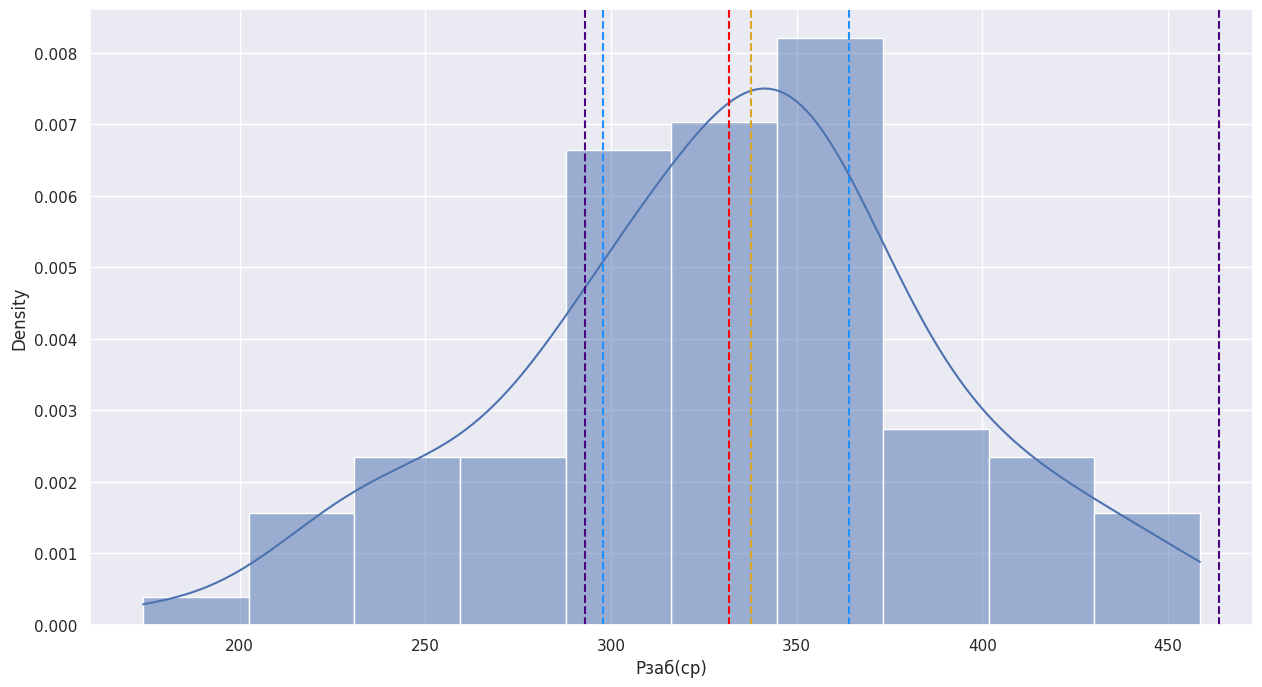

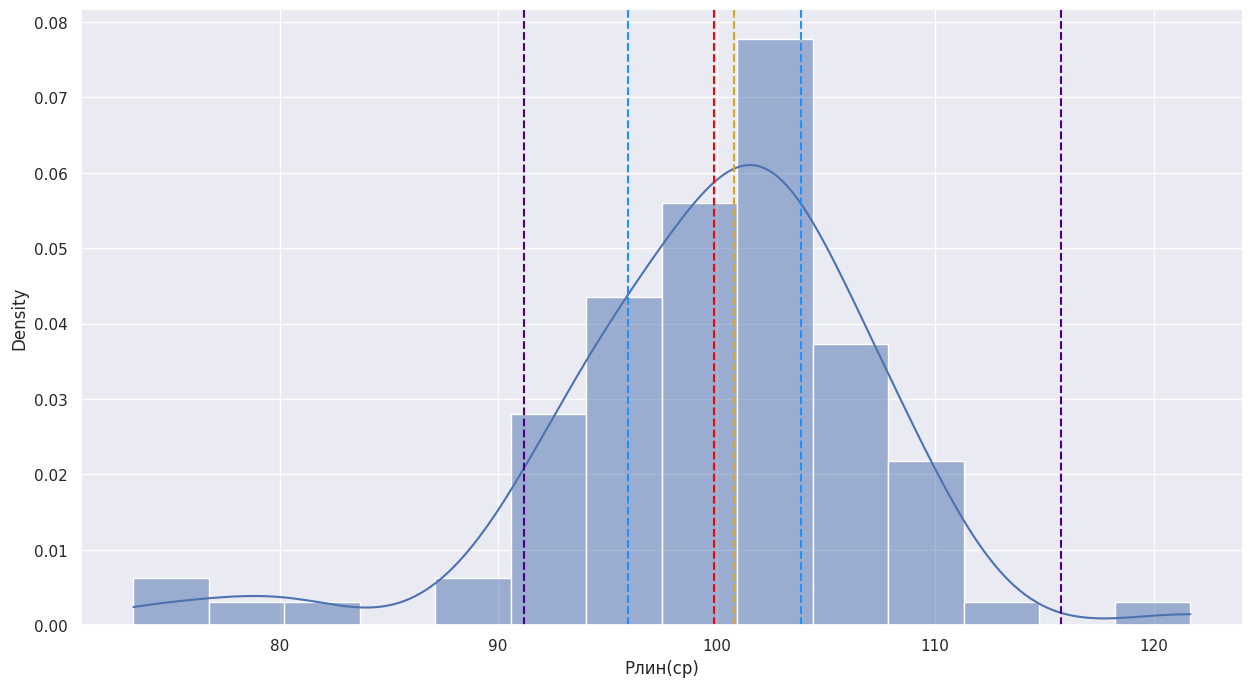

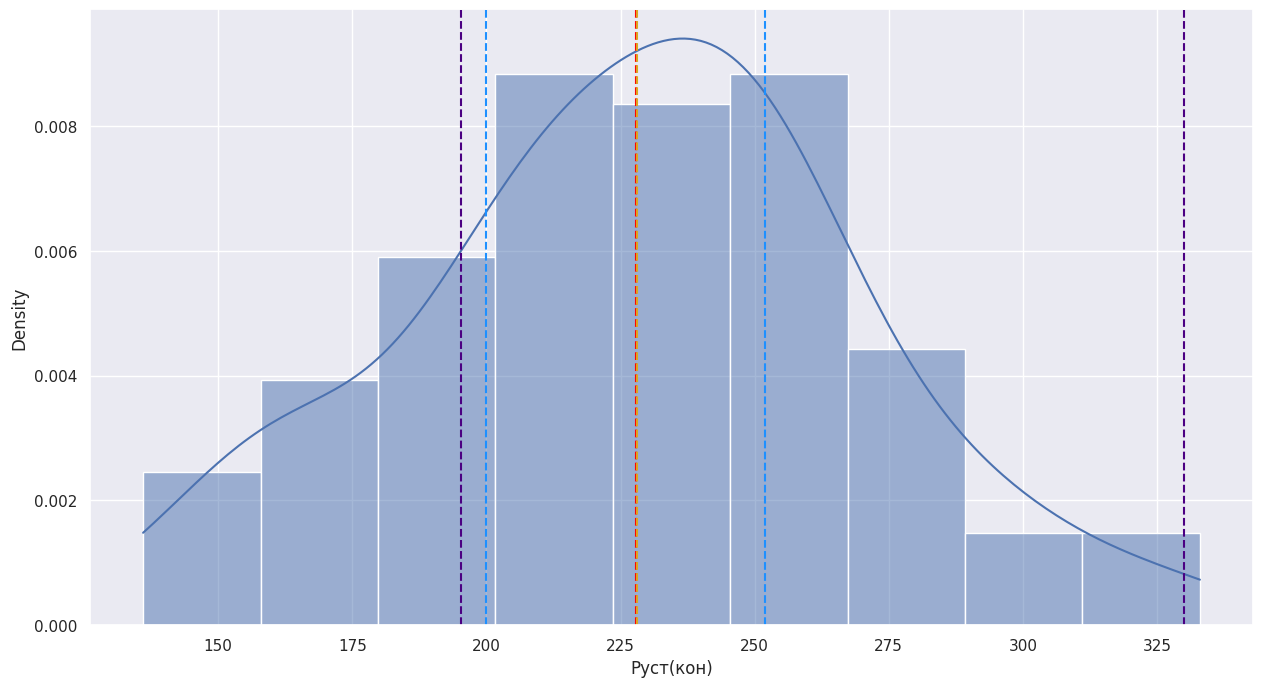

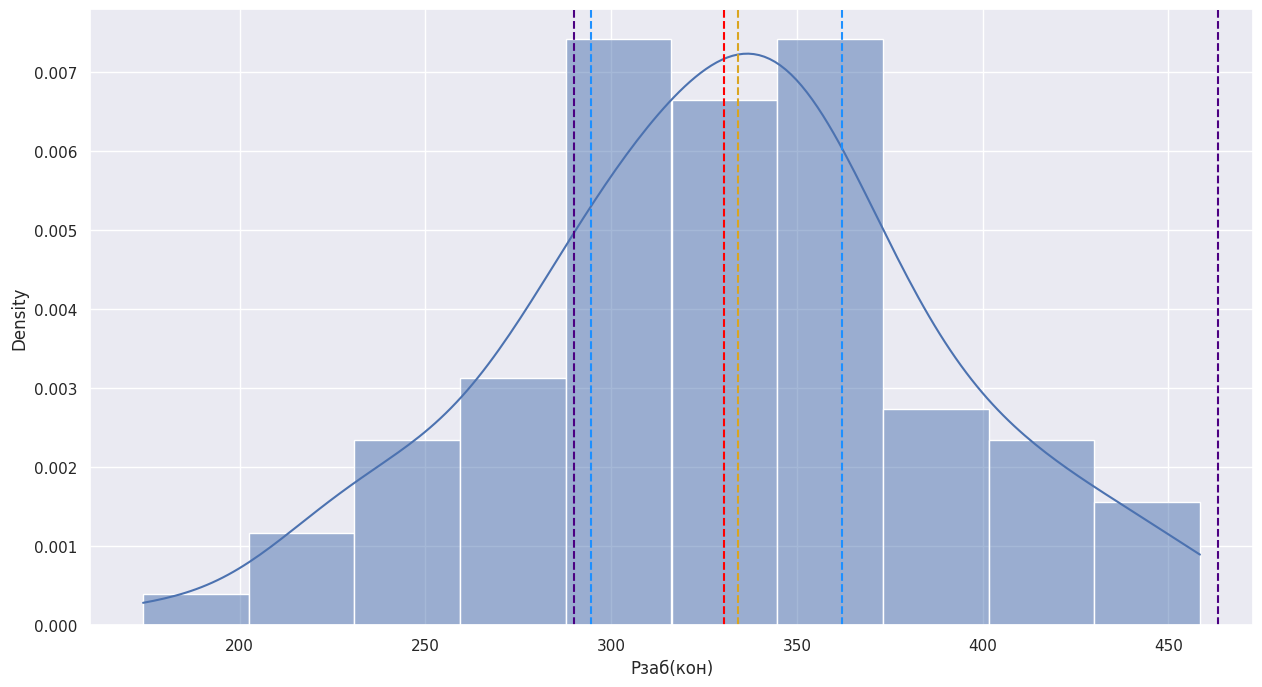

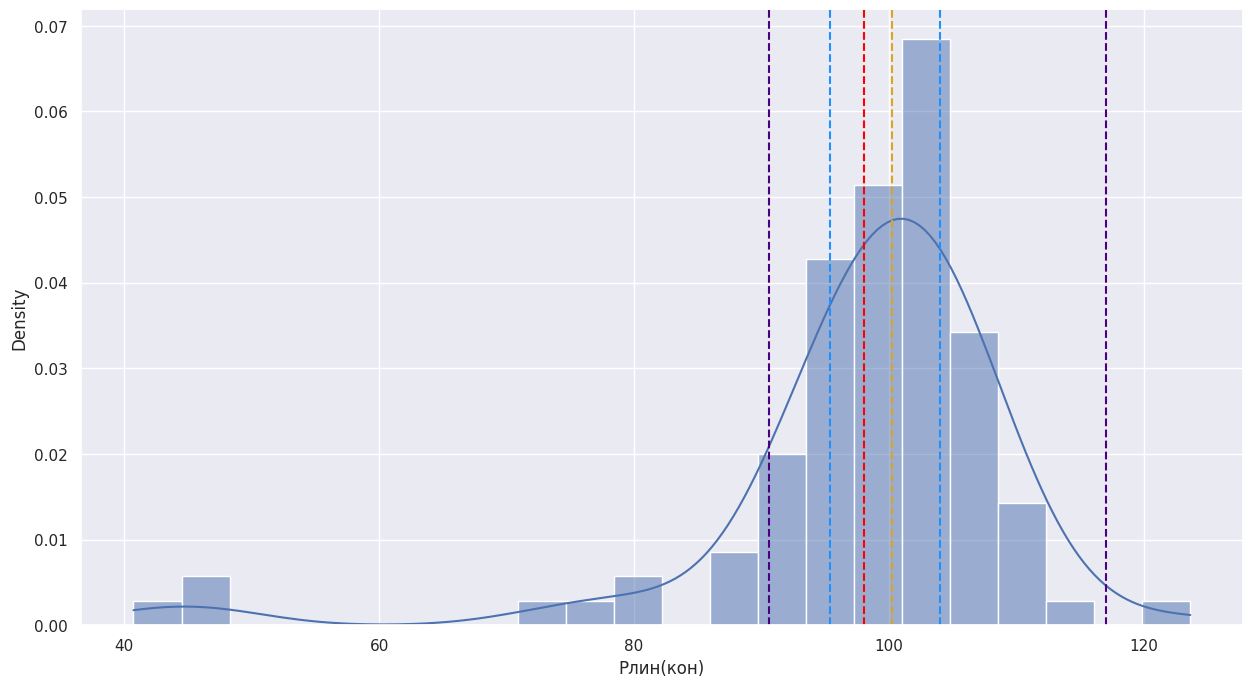

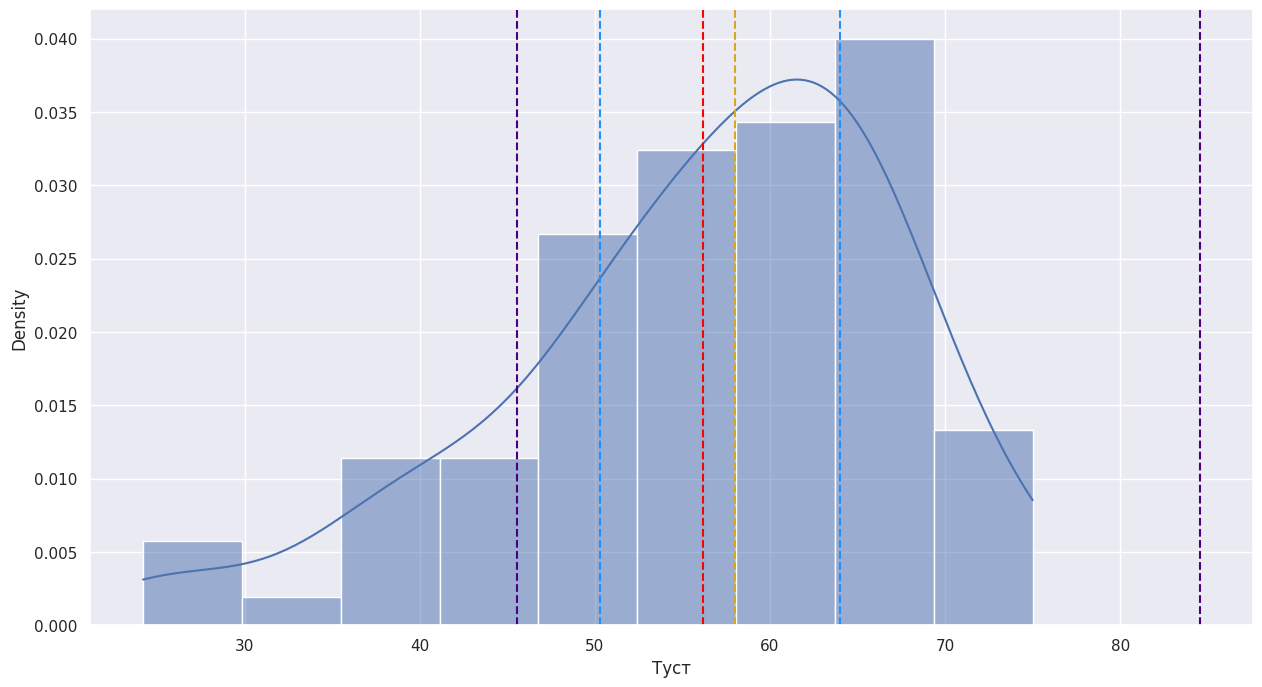

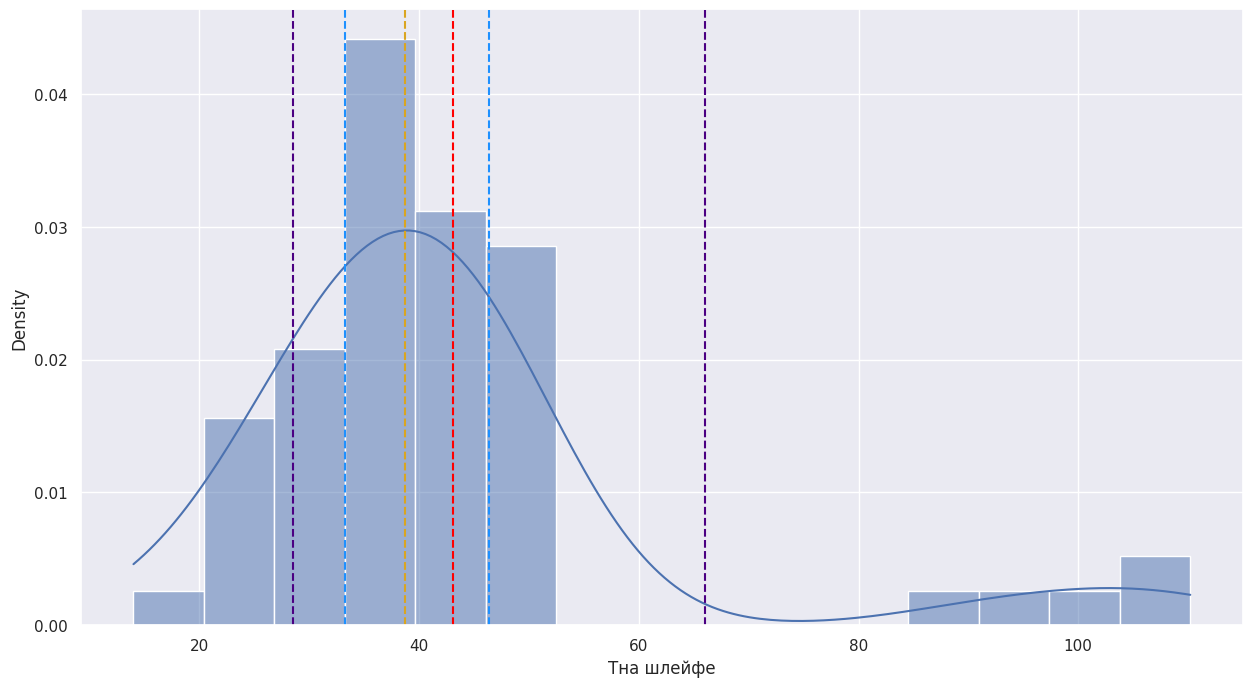

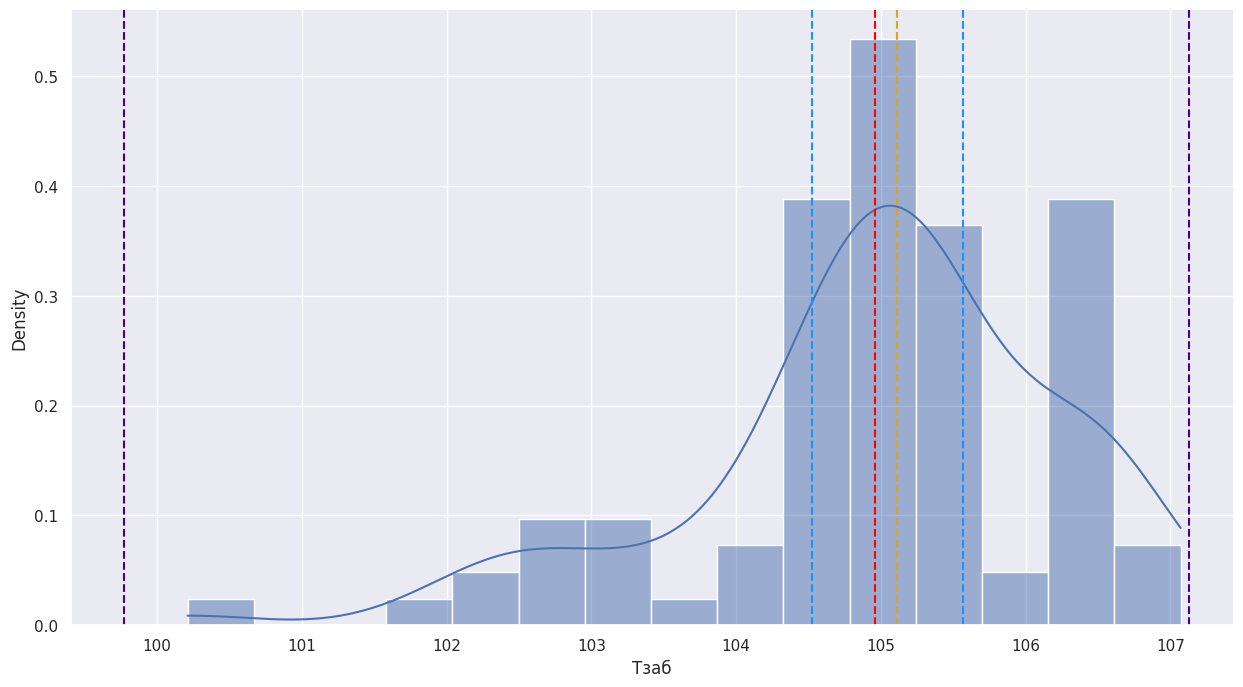

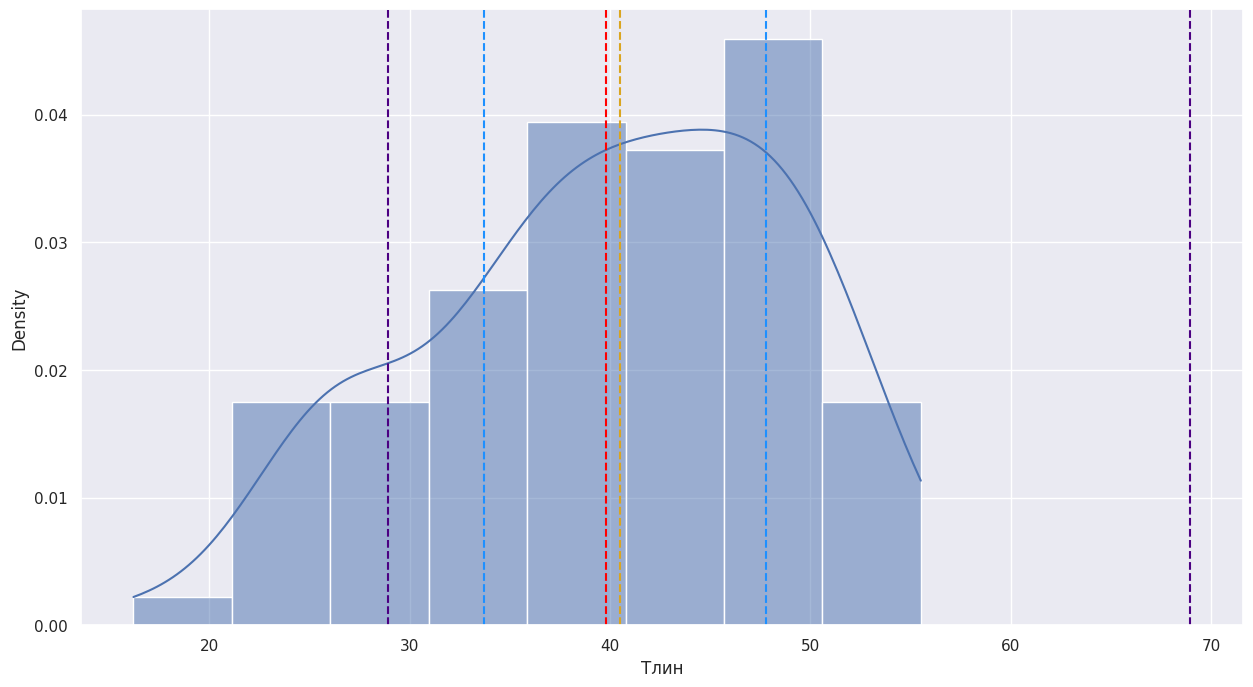

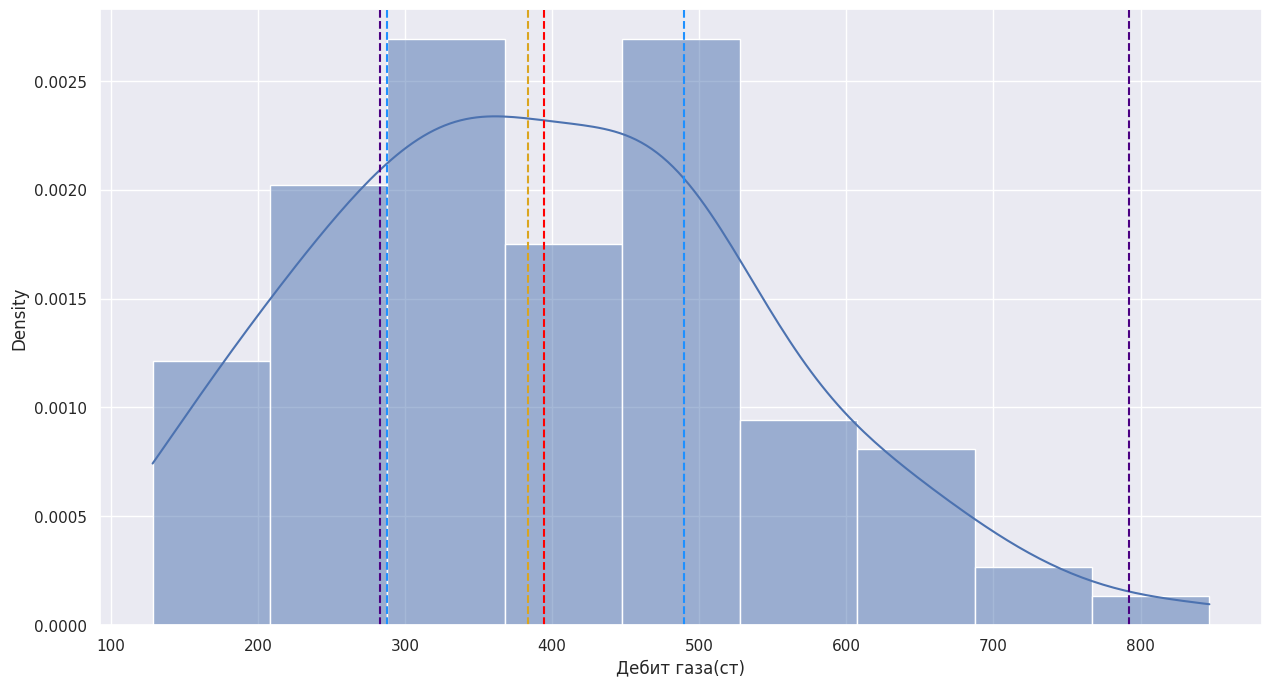

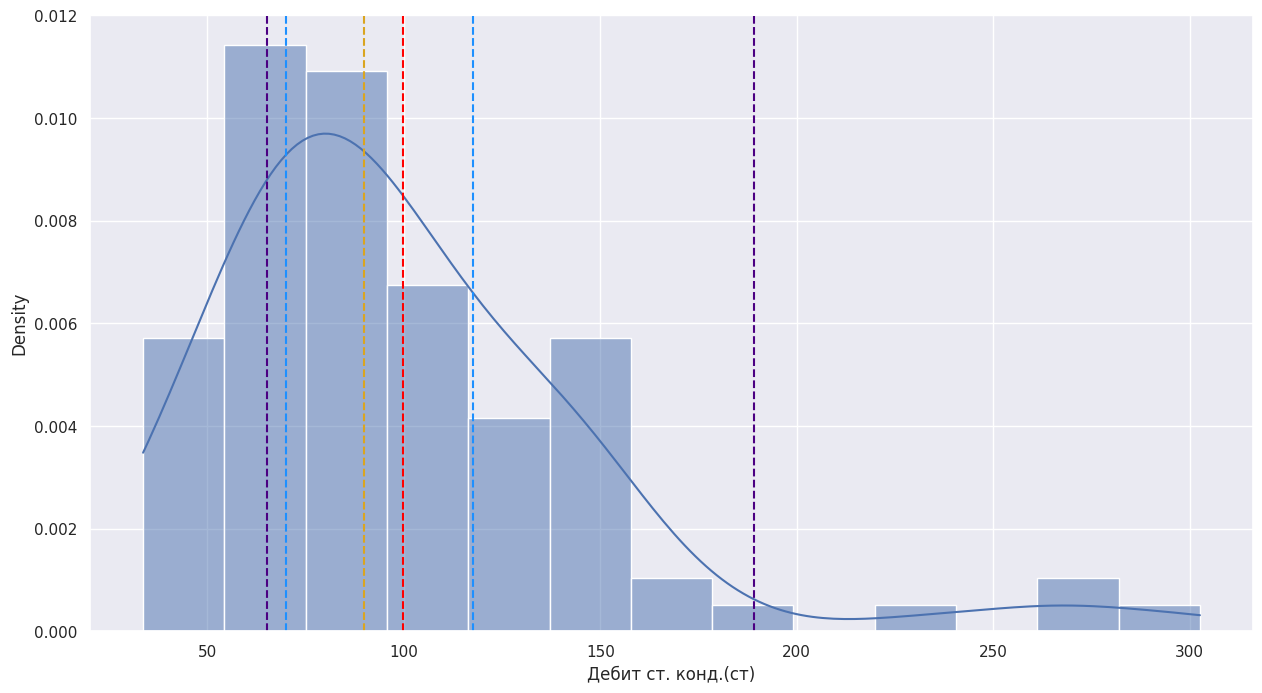

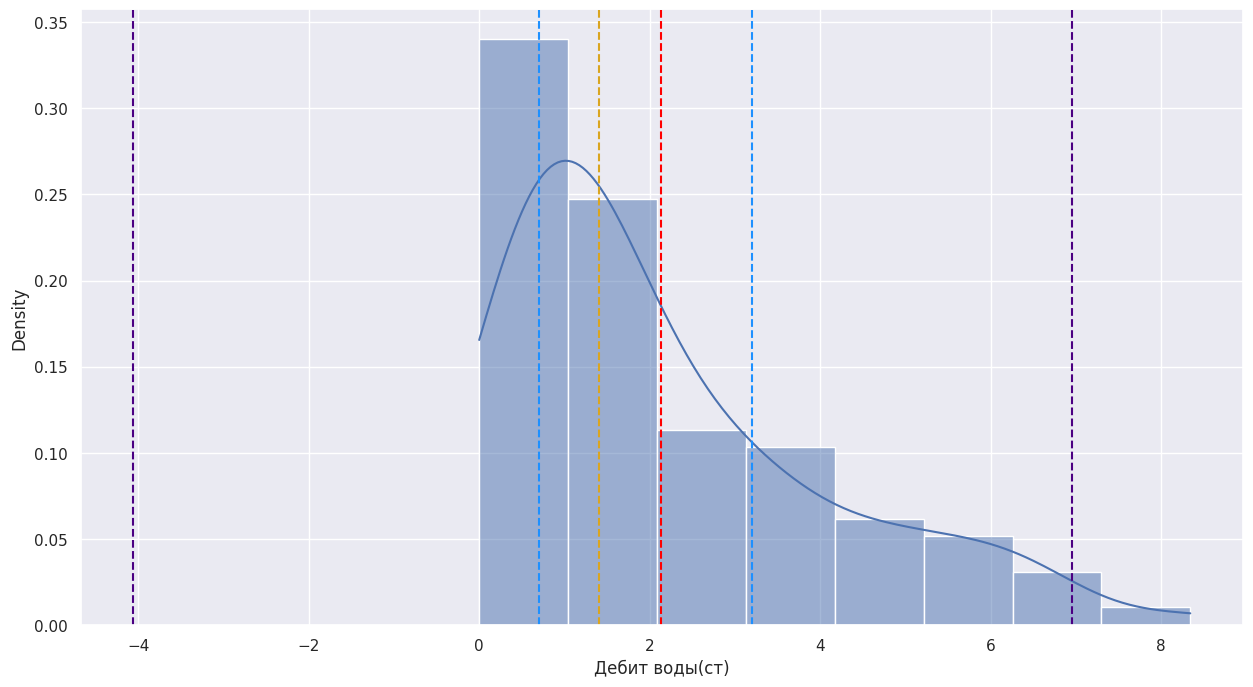

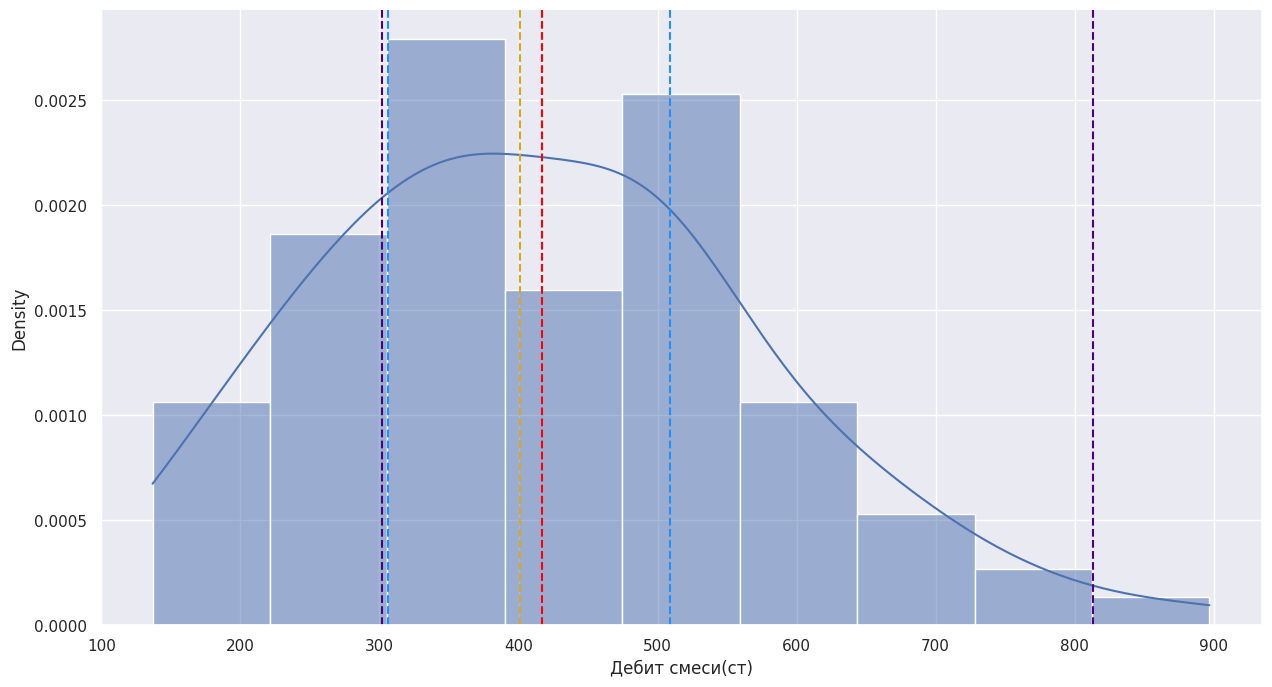

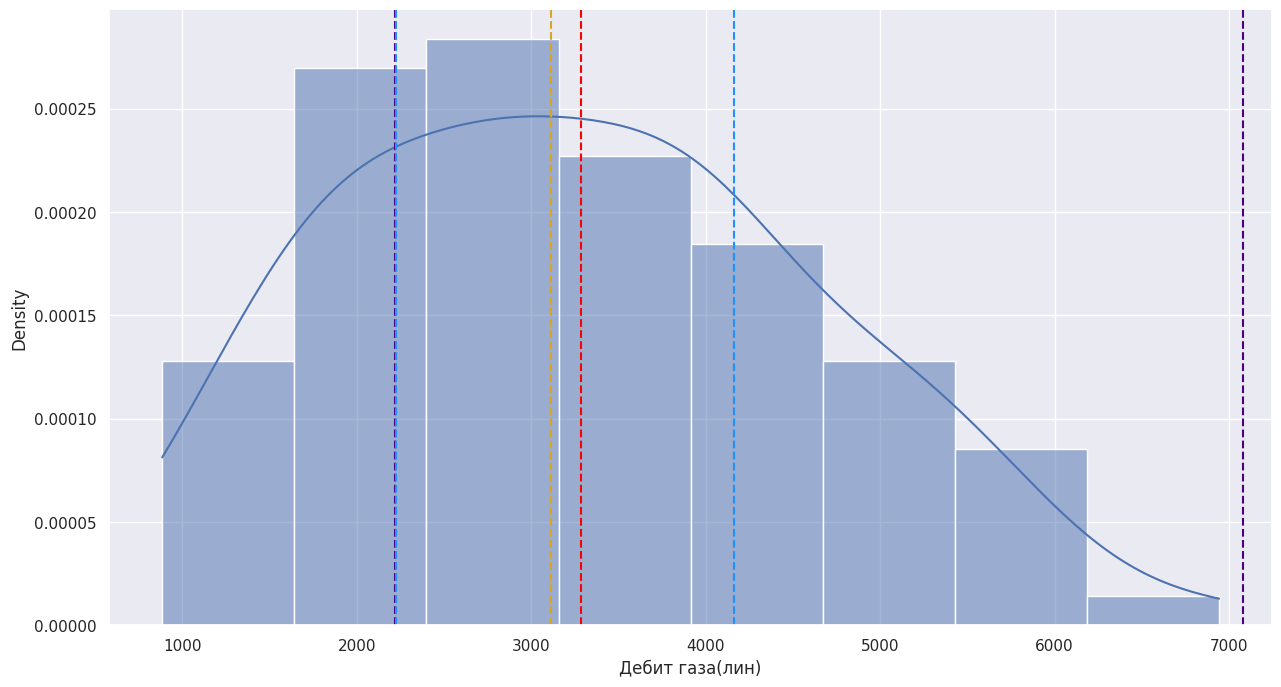

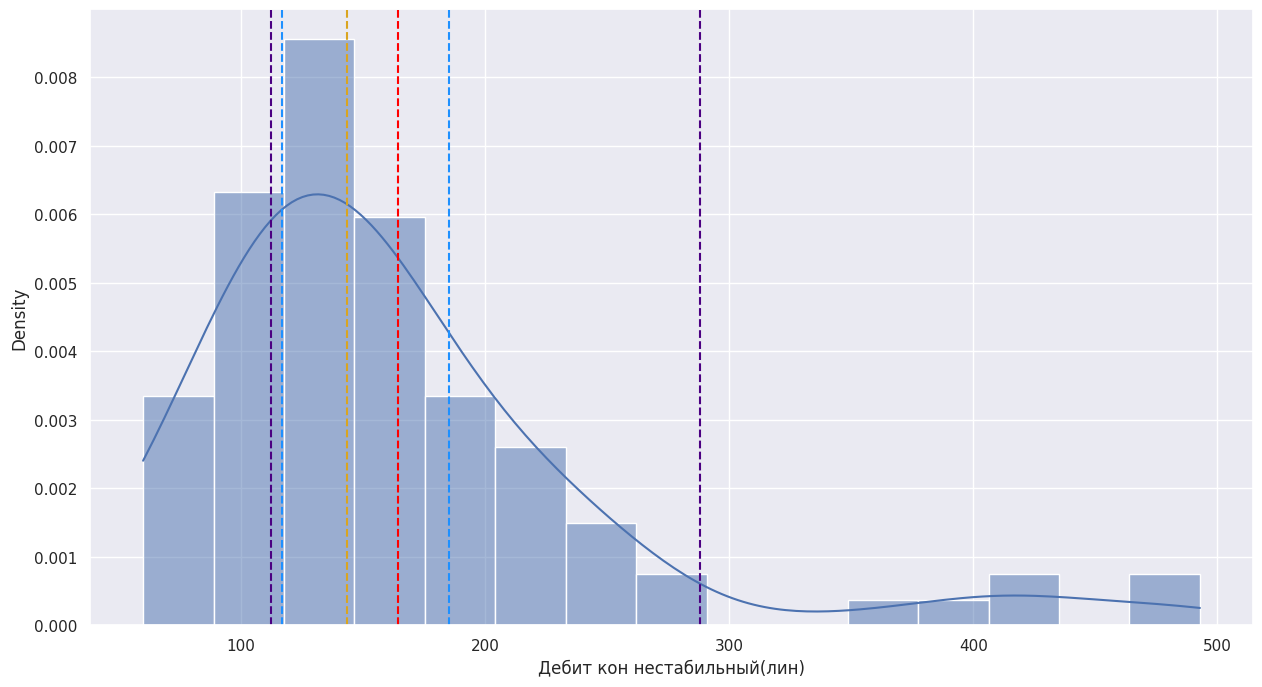

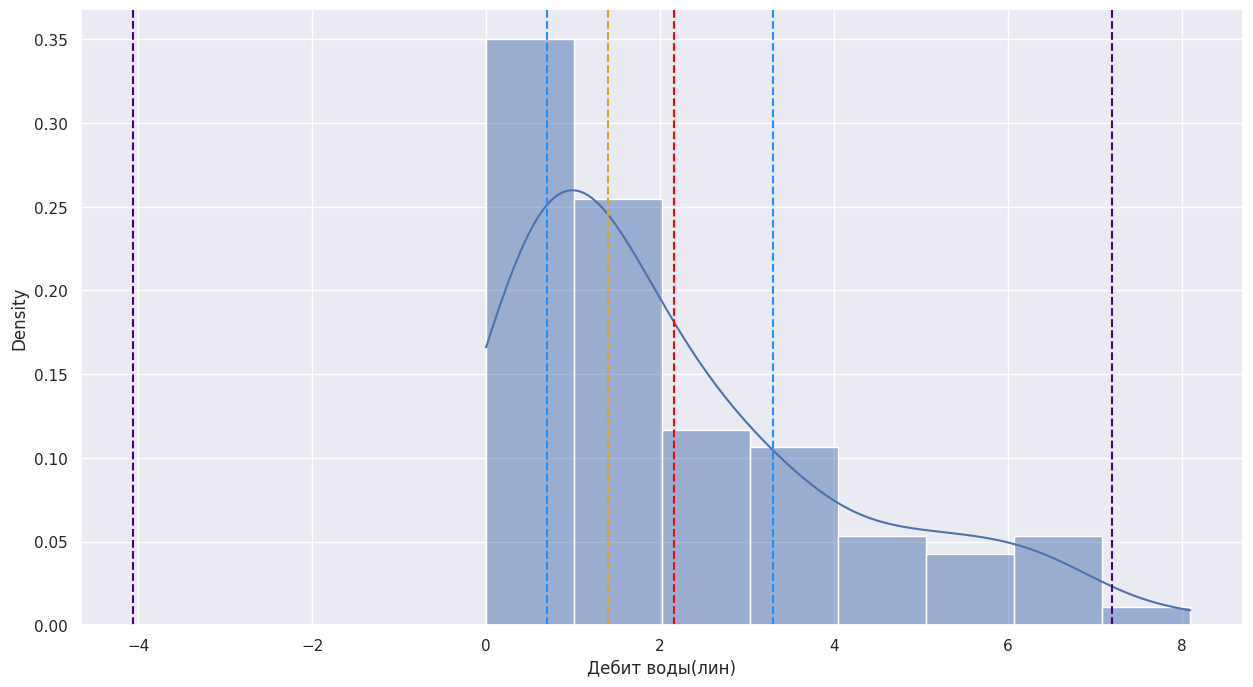

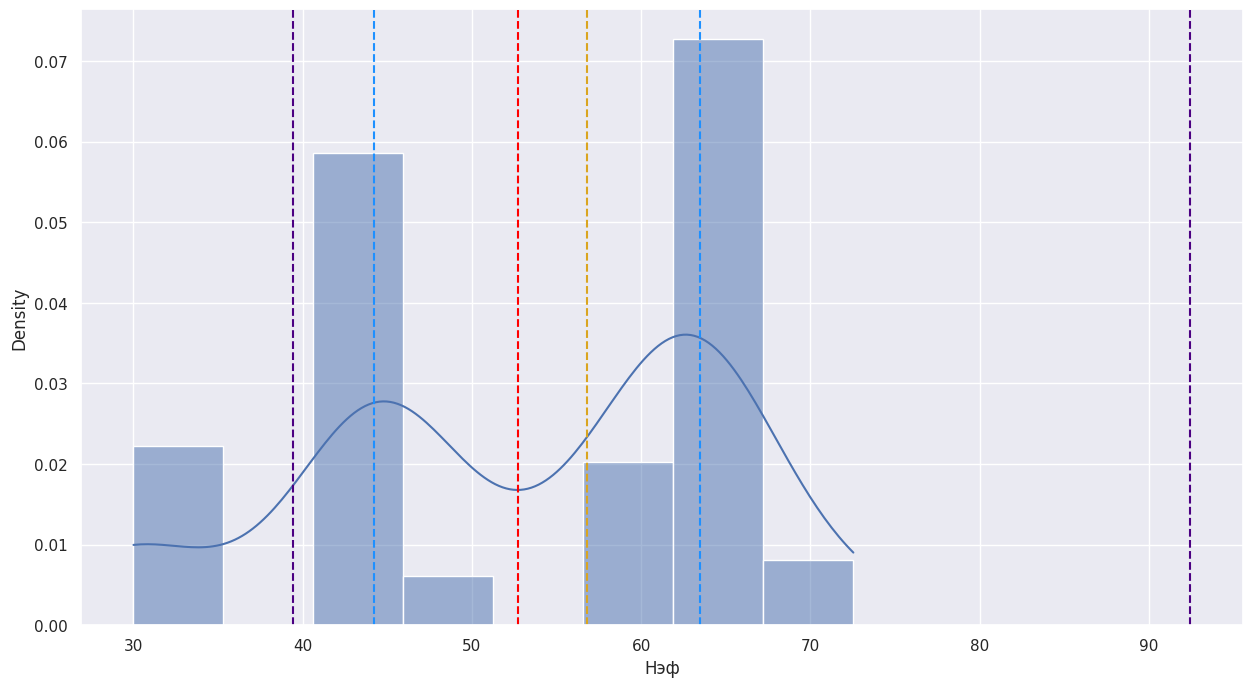

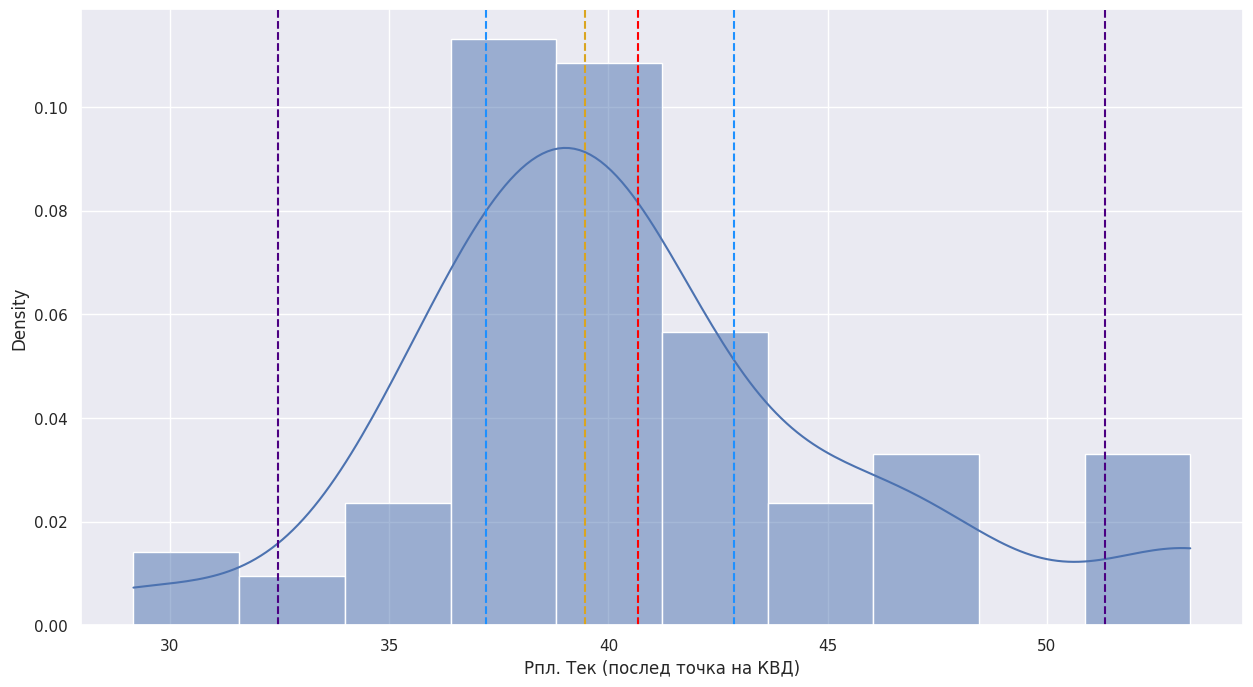

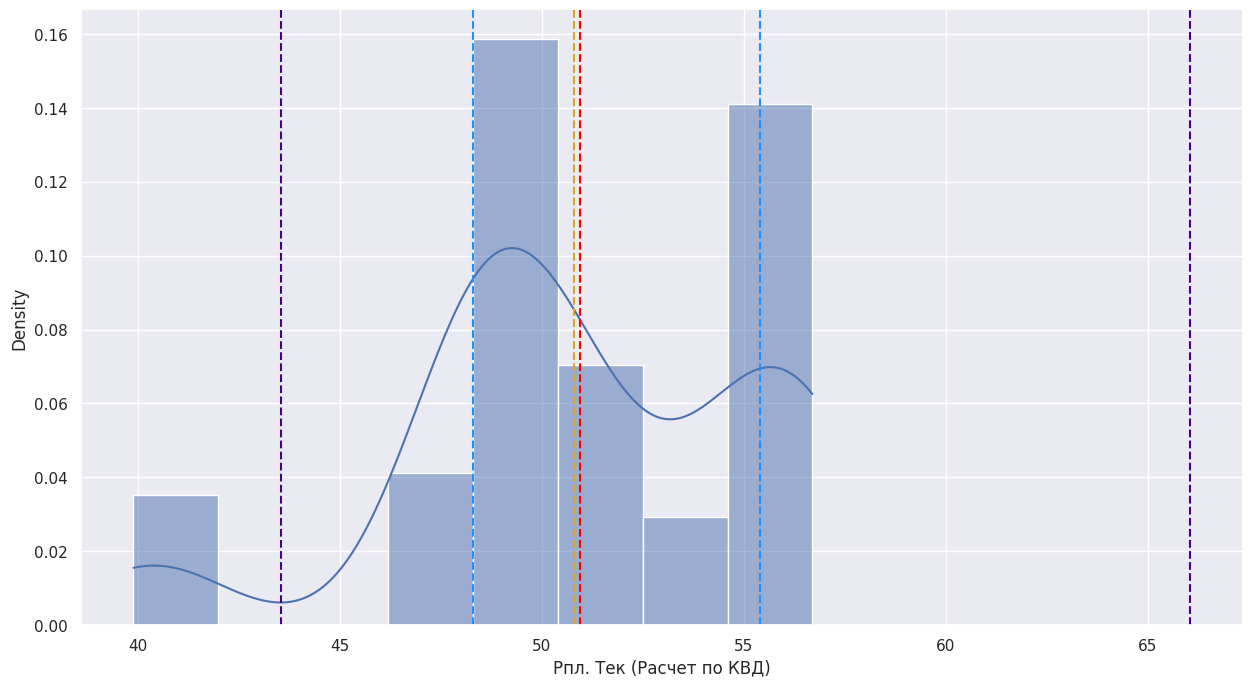

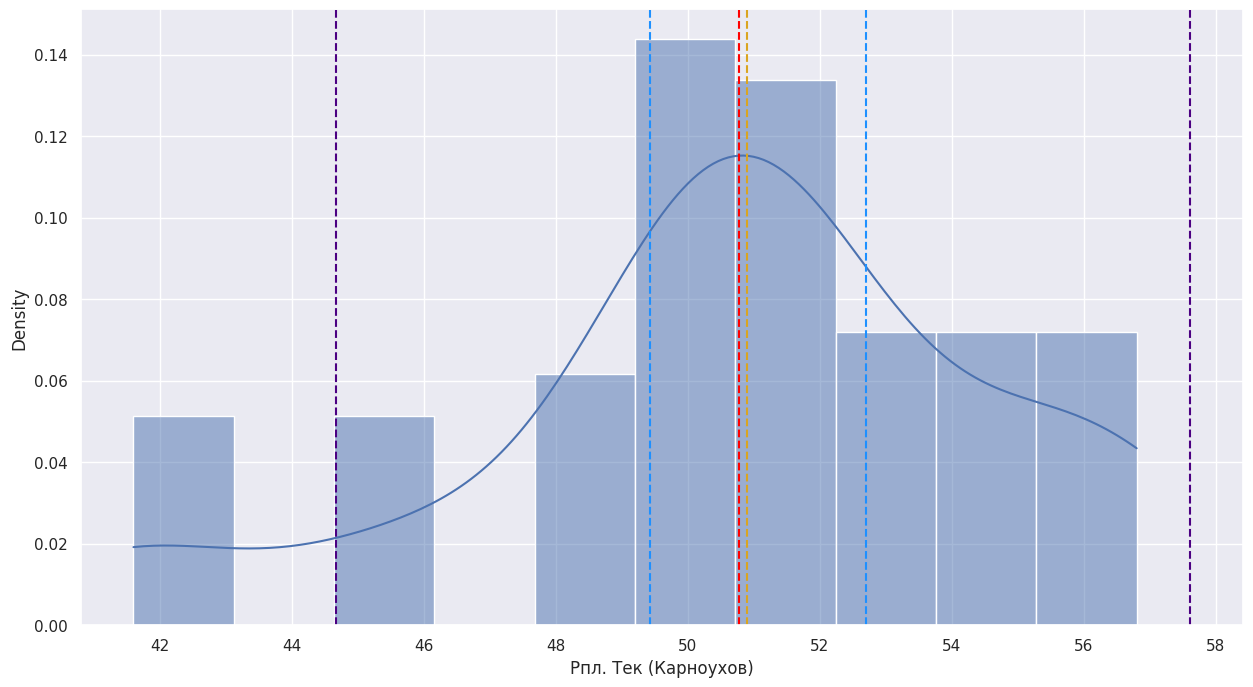

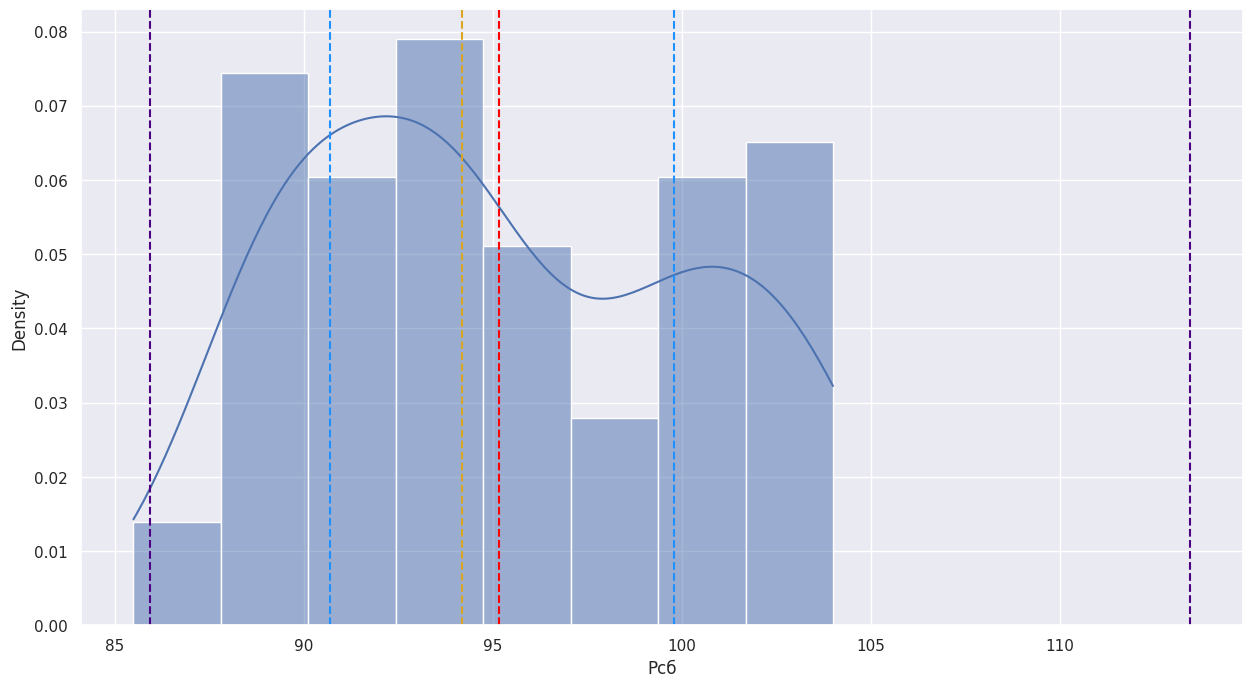

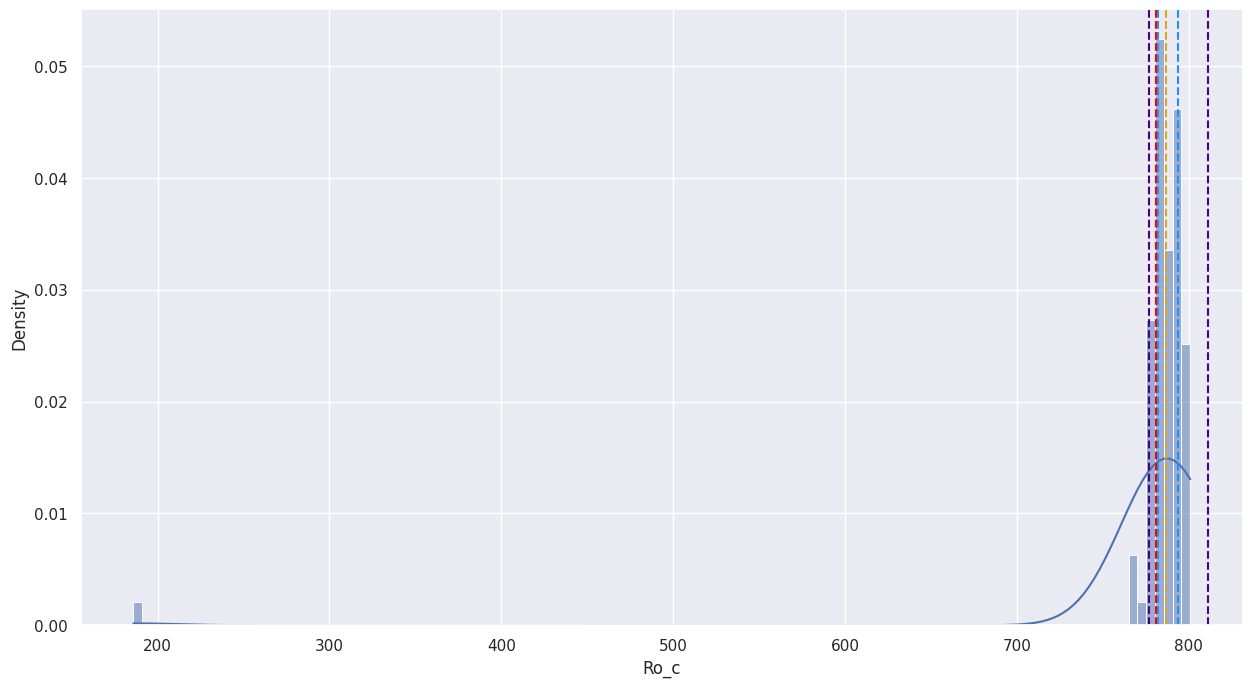

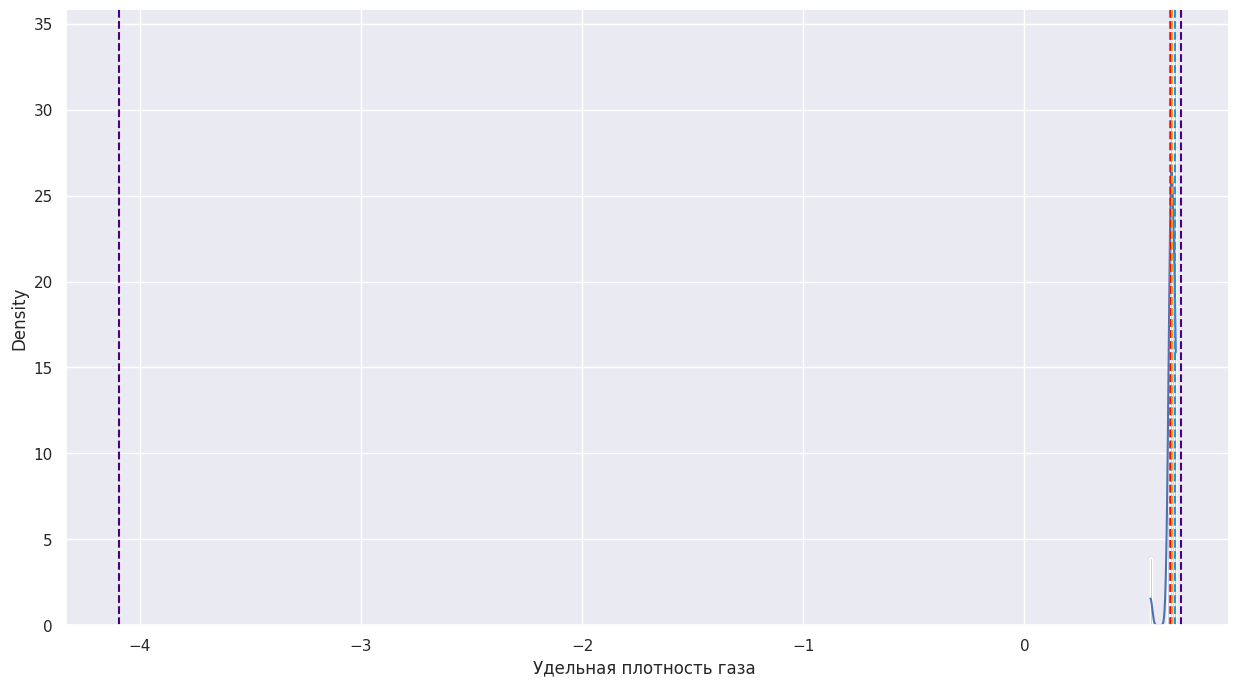

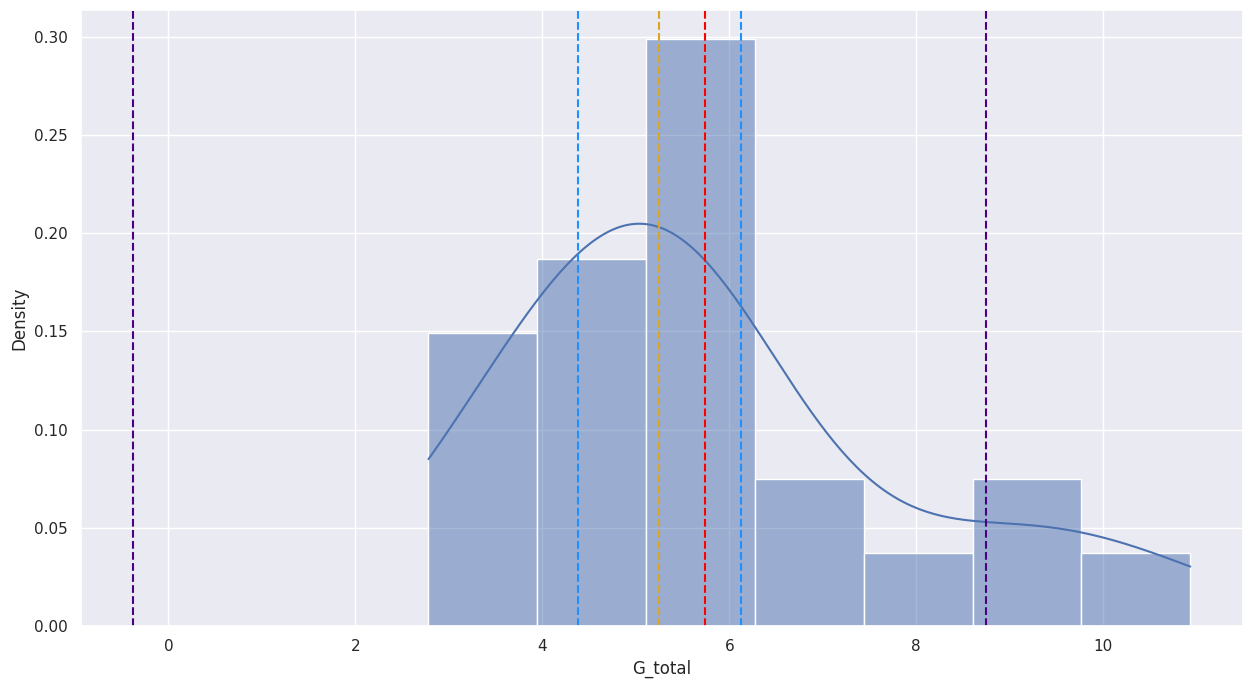

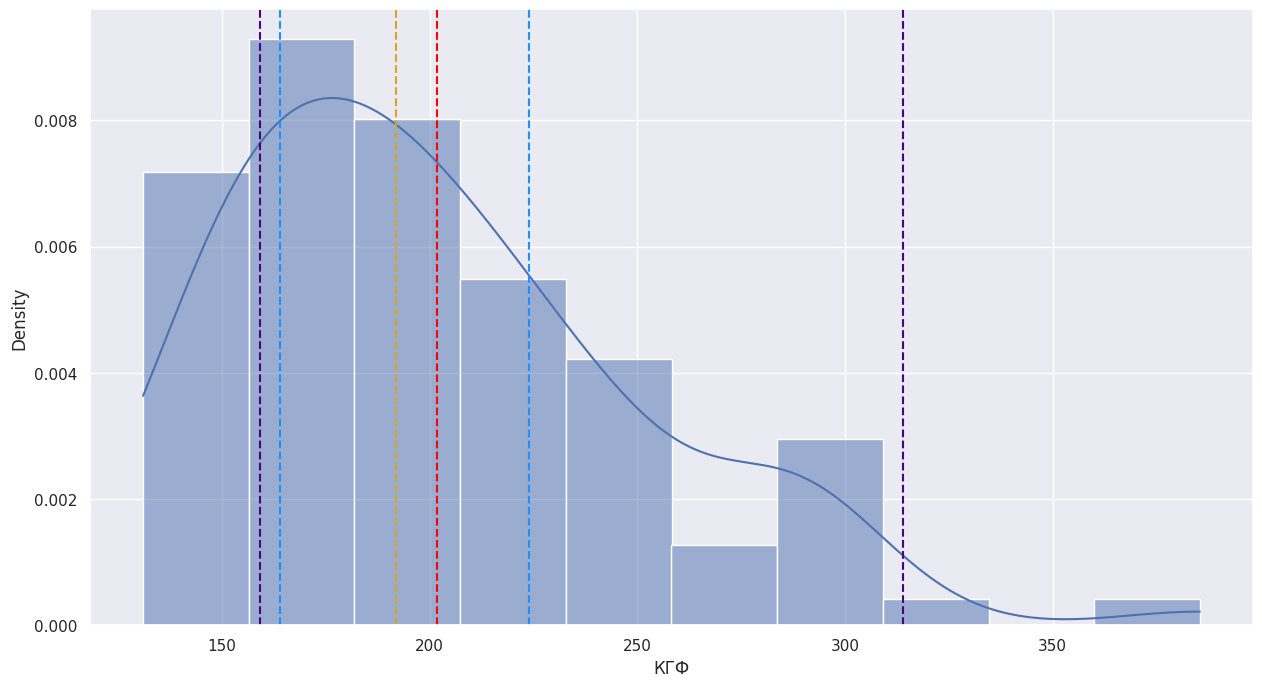

In [11]:
for i in df.columns:
    plt.figure(i)
    sns.histplot(df[i],kde=True,stat="density")
    plt.axvline(f.iloc[3][i]-1.5*f.iloc[10]["Dшт"], color="indigo", ls='--') #q1-1.5*iqr
    plt.axvline(f.iloc[3][i], color="dodgerblue", ls='--') #первый квартиль
    plt.axvline(f.iloc[4][i], color="red", ls='--') #среднее
    plt.axvline(f.iloc[5][i], color="goldenrod", ls='--') #медиана
    plt.axvline(f.iloc[6][i], color="dodgerblue", ls='--') #третий квартиль
    plt.axvline(f.iloc[6][i]+1.5*f.iloc[10][i], color="indigo", ls='--') #q3+1.5*iqr
    plt.show()

У признака "Удельная плотность газа" пороги слишком далекие, что лишний раз иллюстрирует, что отсекать через интерквартильный размах можно только при близком к нормальному распределении. Однозначно сказать, что слева наблюдается выброс нельзя из-за малого размера выборки. Это вполне может быть состояние потока со скважины.

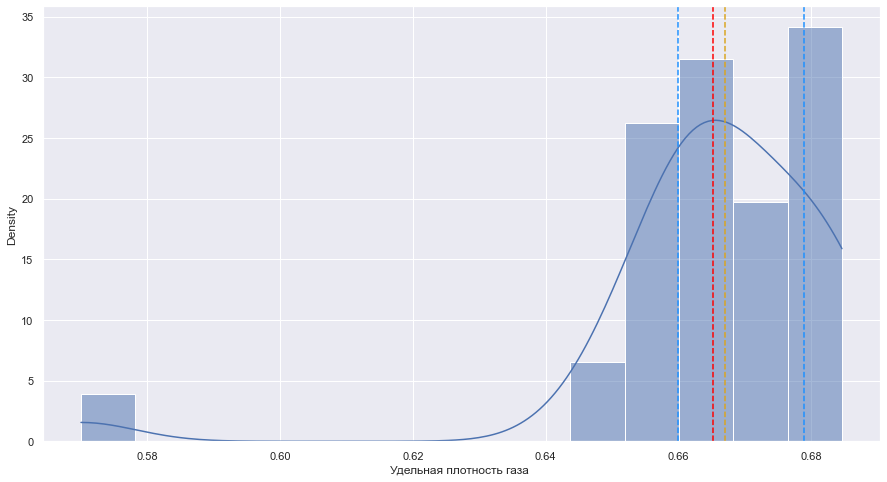

In [11]:
sns.histplot(df[df.columns[25]],kde=True,stat="density")
plt.axvline(f.iloc[3][df.columns[25]], color="dodgerblue", ls='--') #первый квартиль
plt.axvline(f.iloc[4][df.columns[25]], color="red", ls='--') #среднее
plt.axvline(f.iloc[5][df.columns[25]], color="goldenrod", ls='--') #медиана
plt.axvline(f.iloc[6][df.columns[25]], color="dodgerblue", ls='--') #третий квартиль

# Важность признаков

Так как у нас задача регрессии, то можно использовать по построение вектора важности признаков из рандомизированного леса принятия решений. В качестве функции стоимости здесь лучше подходит MSE. sklearn не умеет работать с пропущеными значениями, поэтому для целей определения важности заполним пропуски значением -100, само значение лучше подбирать исходя из распределений признаков с пропусками. Это конечно дает смещение оценки, но в задаче отбора признаков мы этим можем пренебречь. При построении модели регрессии для решения задачи так делать не стоит.

In [13]:
df1=df.fillna(-100)
X=df1.iloc[:, 0:25]
Y=df1.iloc[:, 26:28]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)

RandomForestRegressor(max_depth=20, random_state=0)

<Axes: >

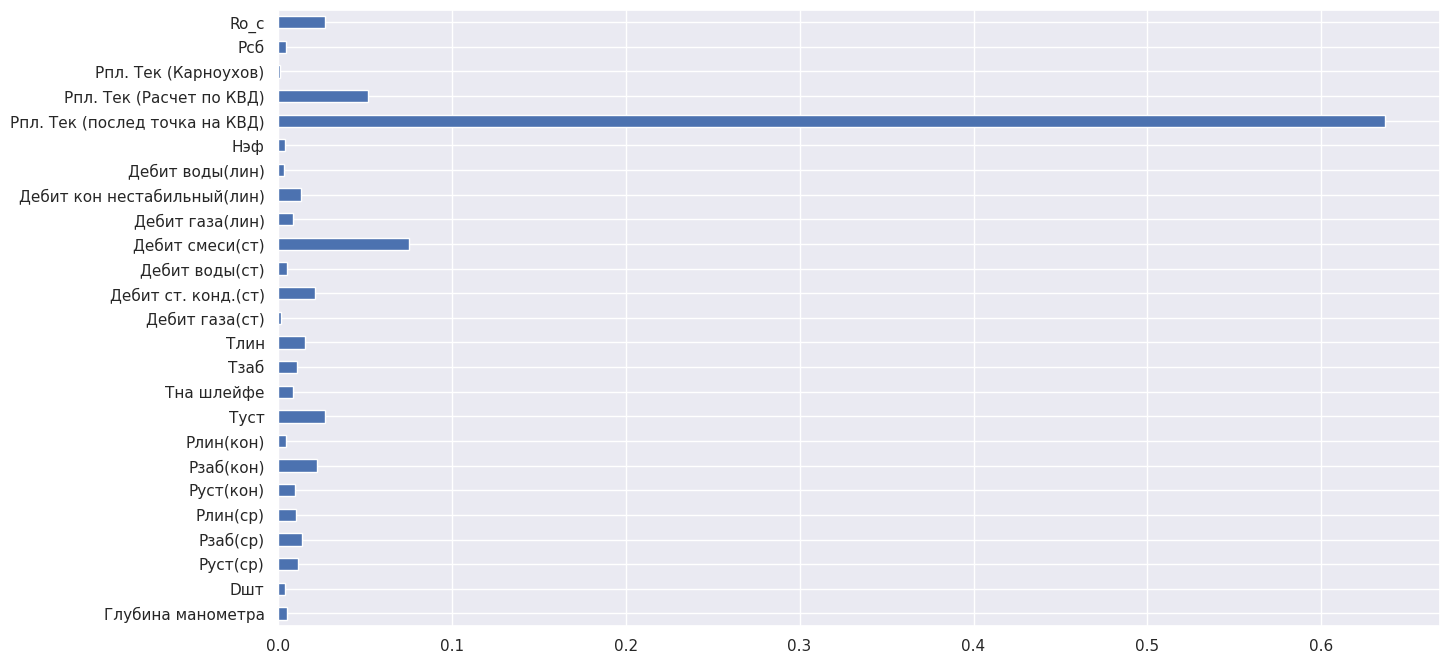

In [14]:
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

# Выводы

Наша задача оставить признаки, которые помогут в решении задачи.
1) Из трех признаков "Pпл. Тек" можно оставить "Pпл. Тек (послед точка на КВД)". У него меньше всего пропусков, высокая важность и неплохая корреляция с "КГФ". Остальные два удаляем
2) Подозрителен параметр "Dшт"
...